# Imports

In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

from gensim.models import Word2Vec
import time
import numpy as np
import nltk
from nltk.corpus import stopwords
import regex as re
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.models import *
from keras import backend as K

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 95% 77.0M/80.9M [00:00<00:00, 178MB/s]
100% 80.9M/80.9M [00:00<00:00, 167MB/s]


In [ ]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


# Load Data

In [ ]:
dataframe=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')
dataframe.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
dataframe=dataframe.drop(['Mon Apr 06 22:19:45 PDT 2009'], axis = 1)
dataframe=dataframe.drop(['NO_QUERY'], axis = 1)
dataframe=dataframe.drop(['_TheSpecialOne_'], axis = 1)

In [ ]:
dataframe.rename(columns = {'0':'Label','1467810369':'ID',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Data'}, inplace = True)

# WordCloud (Before Processing)

In [ ]:
positive = " ".join(dataframe[dataframe['Label'] == 4]['Data'].to_list())
# neutral = " ".join(dataframe[dataframe['Label'] == 2]['Data'].to_list())
negative = " ".join(dataframe[dataframe['Label'] == 0]['Data'].to_list())

fig, ax = plt.subplots(1, 2, figsize=(15,15))
pos_cloud = WordCloud(width=256, height=256, collocations=False).generate(positive)
# neut_cloud = WordCloud(width=256, height=256, collocations=False).generate(neutral)
neg_cloud = WordCloud(width=256, height=256, collocations=False).generate(negative)
clouds = [pos_cloud, neg_cloud]
titles = ["Positive Tweets", "Negative Tweets"]

for no, x in enumerate(clouds):
    ax[no].imshow(x)
    ax[no].axis('off')
    ax[no].set_title(titles[no])

# Preprocessing 
The final dataframe comprises processed sentences, NOT lists.

In [ ]:
def remove_urls(text):
  
    prog = re.compile(r'https?:\/\/\S+|www\.\S+')
    text_processed =  prog.sub(r'', text)
    return text_processed

In [ ]:
def lower(text):
  
    text_processed = text.lower()
    return text_processed

In [ ]:
def remove_num(text):
    text_processed = re.sub(r'\d+', '', text)
    return text_processed

In [ ]:
def remove_punc(text):
 
    text_processed = re.sub(r"[^\w\s\d]","", text)
    return text_processed

In [ ]:
stops = stopwords.words("english")

In [ ]:
def remove_stopwords(text):
   
    return " ".join([word for word in str(text).split() if word not in stops])

In [ ]:
def remove_space(text):
  
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove

In [ ]:
def make_list(text):
  
    lst = text.split(" ")
    return lst

In [ ]:
def clean_text(data):
  
    data['Data']=data['Data'].apply(lambda x:remove_urls(x))
    data['Data']=data['Data'].apply(lambda x:lower(x))
    data['Data']=data['Data'].apply(lambda x:remove_num(x))
    data['Data']=data['Data'].apply(lambda x:remove_punc(x))
    data['Data']=data['Data'].apply(lambda x:remove_stopwords(x))
    data['Data']=data['Data'].apply(lambda x:remove_space(x))
    return data

In [ ]:
dataframe = dataframe.sample(frac = 1, ignore_index=True)
dataframe['Label'] = dataframe['Label'].replace({4: 1})
# dataframe=dataframe.iloc[0:1000]

In [ ]:
dataframe = clean_text(dataframe)

# WordCloud (After Processing)

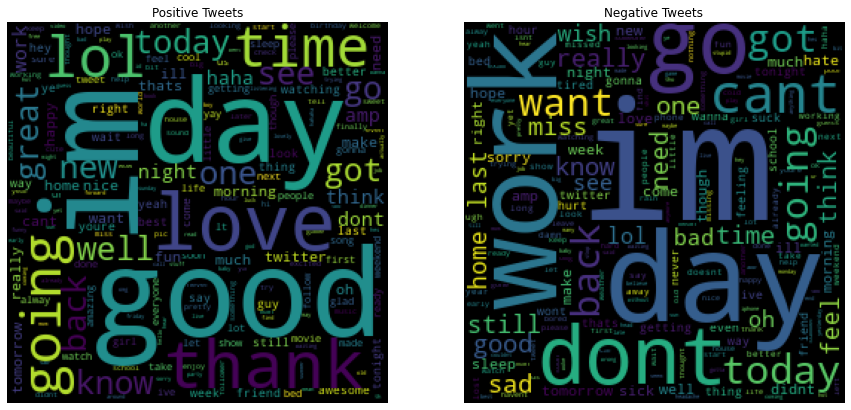

In [ ]:
positive = " ".join(dataframe[dataframe['Label'] == 4]['Data'].to_list())
# neutral = " ".join(dataframe[dataframe['Label'] == 2]['Data'].to_list())
negative = " ".join(dataframe[dataframe['Label'] == 0]['Data'].to_list())

fig, ax = plt.subplots(1, 2, figsize=(15,15))
pos_cloud = WordCloud(width=256, height=256, collocations=False).generate(positive)
# neut_cloud = WordCloud(width=256, height=256, collocations=False).generate(neutral)
neg_cloud = WordCloud(width=256, height=256, collocations=False).generate(negative)
clouds = [pos_cloud, neg_cloud]
titles = ["Positive Tweets", "Negative Tweets"]

for no, x in enumerate(clouds):
    ax[no].imshow(x)
    ax[no].axis('off')
    ax[no].set_title(titles[no])

# Reduce Dataset Size for Convenience

In [ ]:
dataframe

,Label,ID,Data
446565,0,2068456299,glennedley want vw golf back stuck stupid old ...
1015749,4,1881605915,jester hit head
460515,0,2072467221,snuffylafagous hes idol yeah done wanna watch ...
1109853,4,1971956742,gennin liked feel way times
398360,0,2056868412,im learning use twitter bad yet popular finlan...
...,...,...,...
645515,0,2236298193,want girlfriend
759013,0,2296009003,deathstarkiller likewise gonna rock straight t...
557192,0,2204455538,moved new apartment internet yet though
1320081,4,2014547497,troethom might wait running windows


# Tf-Idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
train_X = dataframe['Data']
X_train_tf = tf_idf.fit_transform(train_X)
X_train_tf = tf_idf.transform(train_X)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
X_train_tf = X_train_tf.toarray()

n_samples: 1000, n_features: 3562


In [ ]:
list_external=[]
for i in range(dataframe.shape[0]):
    dictinary=dict(zip(tf_idf.get_feature_names(), X_train_tf[i]))
    array=dataframe.iloc[i][2].split(" ")
    list_internal=[]
    for j in array:
        if j in dictinary:
            list_internal.append(dictinary[j])
        else:
           list_internal.append(0.0)
    list_external.append(np.asarray(list_internal))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_score = np.array(list_external)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


# Sentiment Scores

In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
list(swn.senti_synsets('slow'))
sentence='It was a really good day'
from nltk.tag import pos_tag
token = nltk.word_tokenize(sentence)
after_tagging = nltk.pos_tag(token)
print (token)
print (after_tagging)
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
sentiment = 0.0
tokens_count = 0
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['It', 'was', 'a', 'really', 'good', 'day']
[('It', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('really', 'RB'), ('good', 'JJ'), ('day', 'NN')]


In [ ]:
def sentiment_value(after_tagging):
  sentiment_vector=[]
  for word, tag in after_tagging:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                sentiment_vector.append(1.0)
                continue
  
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                sentiment_vector.append(1.0)
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                sentiment_vector.append(1.0)
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment_vector.append(1+swn_synset.pos_score() + swn_synset.neg_score())
  return sentiment_vector

In [ ]:
sentiments=[]
for i in dataframe['Data']:
  sentence=i
  token = make_list(sentence)
  after_tagging = nltk.pos_tag(token)
  sentiments.append(np.array(sentiment_value(after_tagging)))

In [ ]:
sentiment_score = np.array(sentiments)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


# Reduce Dataframe to List of Words

In [ ]:
dataframe_list =dataframe['Data'].apply(lambda x:make_list(x))

In [ ]:
dataframe_list

0          [jaimielor, omg, yes, obsessed, know, song, am...
1                                 [thinks, someone, blocked]
2          [debbylovespr, ive, got, one, though, think, m...
3          [twithug, camabigail, snwrose, rmilana, sammi_...
4                                    [headache, chicago, il]
                                 ...                        
1599994                         [park, million, miles, work]
1599995                                [home, feeling, sick]
1599996    [woke, dont, feel, hotthink, drank, much, last...
1599997          [think, thats, enough, pondering, one, day]
1599998    [xpianogirl, ohh, man, wordpress, big, though,...
Name: Data, Length: 1599999, dtype: object

# Word2Vec

In [ ]:
# Skip-gram model (sg = 1)
size = 300
window = 3
min_count = 1
workers = 3
sg = 1
OUTPUT_FOLDER = "/content/drive/MyDrive/IR assignment/"

word2vec_model_file = OUTPUT_FOLDER + 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(dataframe_list).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)


Time taken to train word2vec model: 0.9158926010131836


In [ ]:
# Load the model from the model file
word2vec_model_file='/content/drive/MyDrive/IR assignment/word2vec_300.model'
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Total number of the words 
print(len(sg_w2v_model.wv.vocab))
# Get the mean for the vectors for an example review
print("Print the length after taking average of all word vectors in a sentence:")
# print(np.mean([sg_w2v_model[token] for token in dataframe['Data'][0]], axis=0).shape)

3576
Print the length after taking average of all word vectors in a sentence:


In [ ]:
word2vec = []
for i in range(len(dataframe)):
  word2vec.append(np.array([sg_w2v_model[token] for token in dataframe_list[i]]))
word2vec = np.asarray(word2vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


# Dot Products

In [ ]:
temp=[]
for i in range(1000):
  if(sentiment_score[i].shape==tfidf_score[i].shape):
    t=np.multiply(sentiment_score[i],tfidf_score[i])
    temp.append(t)

In [ ]:
temp=np.asarray(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
x=tf.keras.preprocessing.sequence.pad_sequences(
    temp,
    maxlen=None,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

In [ ]:
x=np.reshape(x,(1000,x.shape[1],1))

In [ ]:
w=tf.keras.preprocessing.sequence.pad_sequences(
    word2vec,
    maxlen=None,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

In [ ]:
d=np.tile(x,(1,1,300))

In [ ]:
final=np.multiply(d,w)

# Train Test Split

In [ ]:
test_size=0.2
shuffle_state=True
X_train, X_test, Y_train, Y_test = train_test_split(w, 
                                                        dataframe['Label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)

# BiLSTM with Attention

In [ ]:
class attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
import pickle

with open('outfile', 'wb') as fp:
    pickle.dump(itemlist, fp)



In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(None, x.shape[1], 300))))
model.add(attention(return_sequences=True)) # receive 3D and output 3D
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
# model = Sequential()
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.build(input_shape) 
# input_shape= (None, x.shape[1], 300)
# model.summary()

In [ ]:
input_shape= (None, x.shape[1], 300)
model.build(input_shape) 

In [ ]:
model.summary()

In [ ]:
batch_size = 64
history=model.fit(X_train, Y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[X_test, Y_test])
print(history.history['loss'])
print(history.history['accuracy']) 

# Word2Vec Trial

In [ ]:
import gensim
documents = dataframe_list
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=window, 
                                            min_count=min_count, 
                                            workers=8)
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 744343


In [ ]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

CPU times: user 37min 47s, sys: 7.22 s, total: 37min 55s
Wall time: 19min 26s


(370296182, 391646688)

In [ ]:
w2v_model.most_similar("love")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('luv', 0.6591615080833435),
 ('loves', 0.6214544773101807),
 ('loved', 0.6038304567337036),
 ('lt', 0.5808482766151428),
 ('like', 0.5247968435287476),
 ('amazing', 0.5055606961250305),
 ('awesome', 0.5047027468681335),
 ('miss', 0.5027077794075012),
 ('loving', 0.485171377658844),
 ('hate', 0.48405760526657104)]

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)
embedding_matrix = np.zeros((vocab_size, 300))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataframe_list)


for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

Total words 3577
(3577, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          1073100   
                                                                 
 dropout_15 (Dropout)        (None, 300, 300)          0         
                                                                 
 lstm_15 (LSTM)              (None, 100)               160400    
                                                                 
 dense_36 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,233,601
Trainable params: 160,501
Non-trainable params: 1,073,100
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(X_train, Y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/5


ValueError: ignored